In [1]:
# Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
# SPDX-License-Identifier: Apache-2.0

import numpy as np
import pandas as pd
import sys
sys.path.append('/home/ubuntu/PyMAD/') # TODO: Make this relative path maybe
sys.path.append('/home/ubuntu/TSADModelSelection')

from model_selection.model_selection import RankModels
from model_trainer.entities import ANOMALY_ARCHIVE_ENTITIES, ANOMALY_ARCHIVE_ENTITY_TO_DATA_FAMILY
from model_selection.utils import visualize_predictions, visualize_data
from model_selection.rank_aggregation import trimmed_borda, trimmed_kemeny, borda, kemeny
from metrics.metrics import evaluate_model_selection

In [331]:
### Let's declare the parameters for our Ranking Model

dataset = 'anomaly_archive'
entity = '096_UCR_Anomaly_NOISEECG4'
rank_model_params = {
    'dataset': dataset, # anomaly_archive
    'entity': entity, #'001_UCR_Anomaly_DISTORTED1sddb40', 
    'trained_model_path': r'/home/ubuntu/efs/trained_models/', 
    'downsampling': 10, 
    'min_length': 256, 
    'root_dir': '/home/ubuntu/datasets/',
    'normalize': True, 
    'verbose': False 
}

# Create a ranking object
rankingObj = RankModels(**rank_model_params)
print(rankingObj)

Path to trained models: /home/ubuntu/efs/trained_models/anomaly_archive/096_UCR_Anomaly_NOISEECG4
Models in the model set: ['RNN_1', 'LSTMVAE_3', 'NN_3', 'DGHL_4', 'RNN_3', 'RM_2', 'DGHL_2', 'LSTMVAE_1', 'NN_1', 'RNN_2', 'LSTMVAE_4', 'RM_1', 'DGHL_1', 'RNN_4', 'MD_1', 'DGHL_3', 'RM_3', 'LSTMVAE_2', 'NN_2']
Total number of models in the model set: 19
I am a RankModels object!


### Visualize the datasets

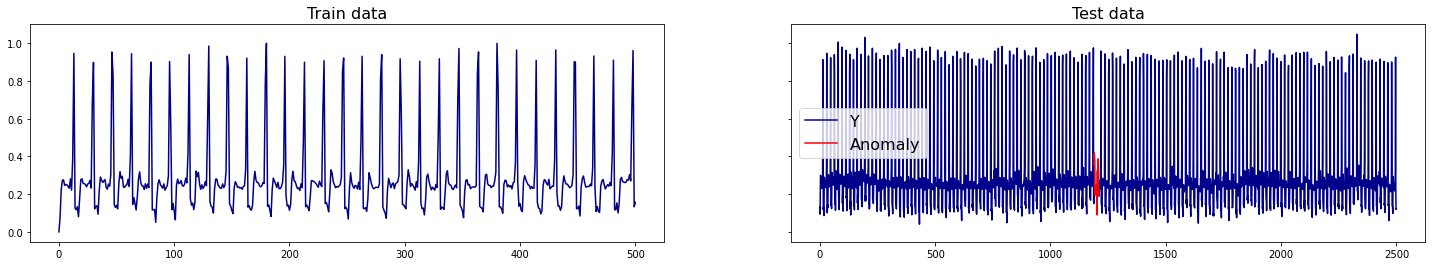

In [332]:
visualize_data(train_data=rankingObj.train_data, test_data=rankingObj.test_data)

### Evaluate Models in the Model Set

In [165]:
models_performance_matrix = rankingObj.evaluate_models(n_repeats=1, n_neighbors=[4], split='test', synthetic_ranking_criterion='f1', n_splits=100)

100%|██████████| 8/8 [03:26<00:00, 25.87s/it]


### Load Pre-Evaluated Ranking Object

In [333]:
import pickle as pkl
import os 

SAVE_DIR = '/home/ubuntu/efs/results'
ranking_obj_file = f'ranking_obj_{entity}.data'
    
with open(os.path.join(SAVE_DIR, dataset, ranking_obj_file), 'rb') as f: 
    rankingObj = pkl.load(f)

### Visualize the trained models

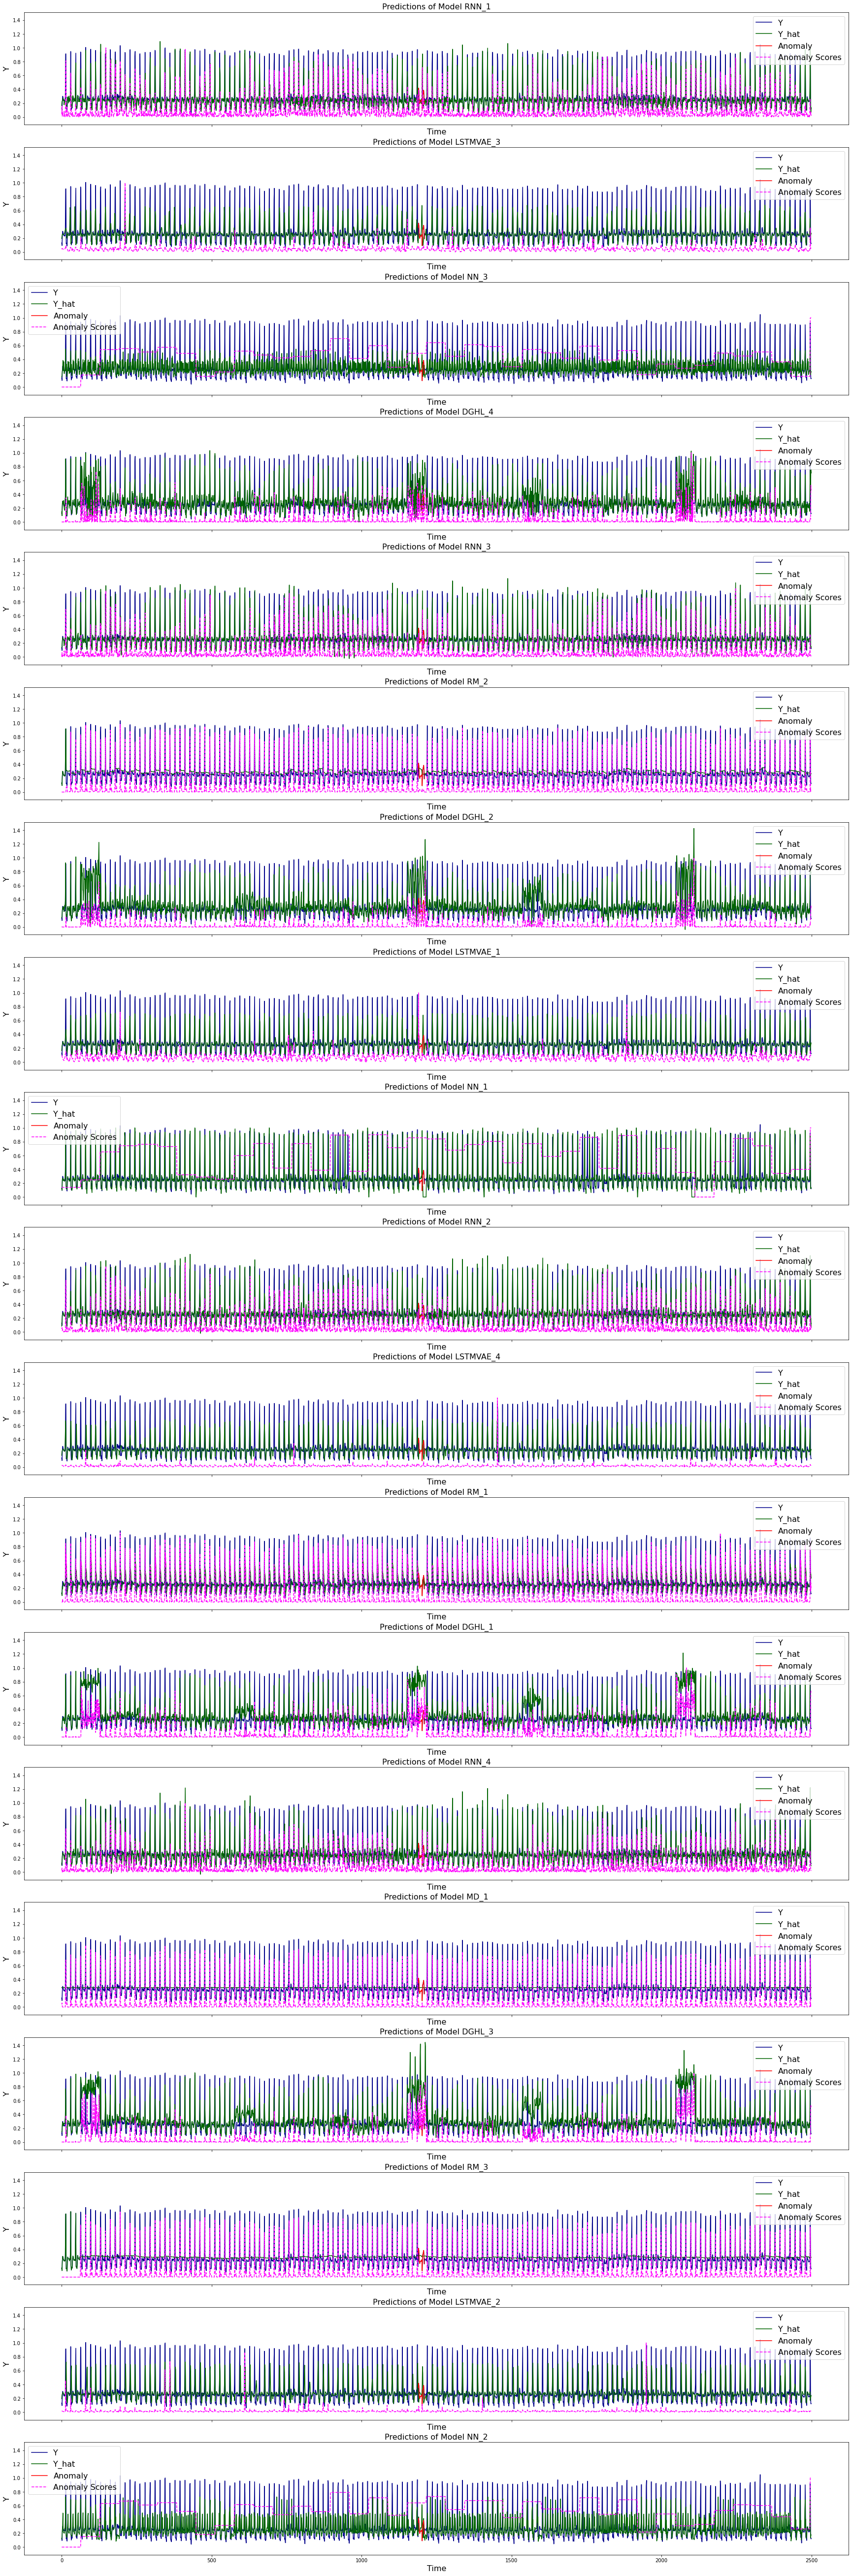

In [334]:
visualize_predictions(rankingObj.predictions, savefig=True)

### Compute the Ranking of Models

In [335]:
rankingObj.models_performance_matrix

PR-AUC  Best F-1       MAE       MSE     SMAPE      MAPE  \
RNN_1      0.187500  0.545450  0.081067  0.023991  0.256091  0.315468   
LSTMVAE_3  0.094595  0.318179  0.091624  0.028107  0.277184  0.339849   
NN_3       0.008607  0.033843  0.125520  0.040031  0.389204  0.473868   
DGHL_4     0.318182  0.777773  0.098680  0.026637  0.310402  0.417479   
RNN_3      0.201923  0.575338  0.077983  0.025601  0.238806  0.315728   
RM_2       0.015982  0.061946  0.120138  0.041260  0.377602  0.486647   
DGHL_2     0.350000  0.823524  0.123693  0.041399  0.357458  0.541776   
LSTMVAE_1  0.000000  0.999995  0.082679  0.023340  0.254501  0.317835   
NN_1       0.032407  0.121738  0.097498  0.041913  0.291138  0.366829   
RNN_2      0.100961  0.335997  0.082944  0.026150  0.252220  0.333817   
LSTMVAE_4  0.269231  0.699995  0.088793  0.026636  0.268549  0.339993   
RM_1       0.015173  0.058905  0.111386  0.032543  0.336544  0.498550   
DGHL_1     0.362069  0.839995  0.130282  0.048071  0.360821  0.570746   
RNN_4      0.223404  0.617643  0.090124  0.029085  0.286285  0.357666   
MD_1       0.035000  0.130840  0.115455  0.040460  0.362929  0.461600   
DGHL_3     0.456521  0.954540  0.121976  0.044271  0.338691  0.546658   
RM_3       0.037102  0.138157  0.116144  0.039699  0.365202  0.471859   
LSTMVAE_2  0.238636  0.646149  0.110911  0.039562  0.325118  0.479575   
NN_2       0.014831  0.057613  0.122924  0.039576  0.374659  0.461161   

           LIKELIHOOD  CENTRALITY_4  CENTRALITY_10  CENTRALITY_16  ...  \
RNN_1        0.339469     659095.25       908310.5   1.057018e+06  ...   
LSTMVAE_3    0.300855     534778.25       840029.5   9.725274e+05  ...   
NN_3         0.324020     577173.75      1087148.5   1.231983e+06  ...   
DGHL_4       0.325305     712329.50      1024824.5   1.131227e+06  ...   
RNN_3        0.345557     671986.75       888720.7   1.028271e+06  ...   
RM_2         0.330283     438186.50       815320.7   9.601871e+05  ...   
DGHL_2       0.322317     675945.75      1005378.7   1.120000e+06  ...   
LSTMVAE_1    0.311437     468541.75       789697.9   9.396964e+05  ...   
NN_1         0.346032     620950.00      1092076.2   1.235334e+06  ...   
RNN_2        0.341169     690638.25       916179.7   1.047079e+06  ...   
LSTMVAE_4    0.303258     487083.25       802103.9   9.564633e+05  ...   
RM_1         0.310318     636104.75       849478.0   9.749203e+05  ...   
DGHL_1       0.321731     638553.00       959907.6   1.082115e+06  ...   
RNN_4        0.338237     675764.25       919700.3   1.066205e+06  ...   
MD_1         0.333642     400134.25       802558.6   9.502874e+05  ...   
DGHL_3       0.325102     660986.25       989129.4   1.112125e+06  ...   
RM_3         0.331505     409309.75       820159.3   9.598662e+05  ...   
LSTMVAE_2    0.262410     549480.50       784875.3   9.362951e+05  ...   
NN_2         0.321635     518375.75      1053837.6   1.210535e+06  ...   

           SYNTHETIC_F1_flip_type_flip_rep_1_2  \
RNN_1                                 0.884205   
LSTMVAE_3                             0.999995   
NN_3                                  0.323074   
DGHL_4                                0.302156   
RNN_3                                 0.874995   
RM_2                                  0.366809   
DGHL_2                                0.272725   
LSTMVAE_1                             0.999995   
NN_1                                  0.428568   
RNN_2                                 0.785042   
LSTMVAE_4                             0.999995   
RM_1                                  0.976739   
DGHL_1                                0.209474   
RNN_4                                 0.865974   
MD_1                                  0.341461   
DGHL_3                                0.204378   
RM_3                                  0.334659   
LSTMVAE_2                             0.999995   
NN_2                                  0.323074   

           SYNTHETIC_PR-AUC_flip_type_flip_rep_1_2  \
RNN_1           

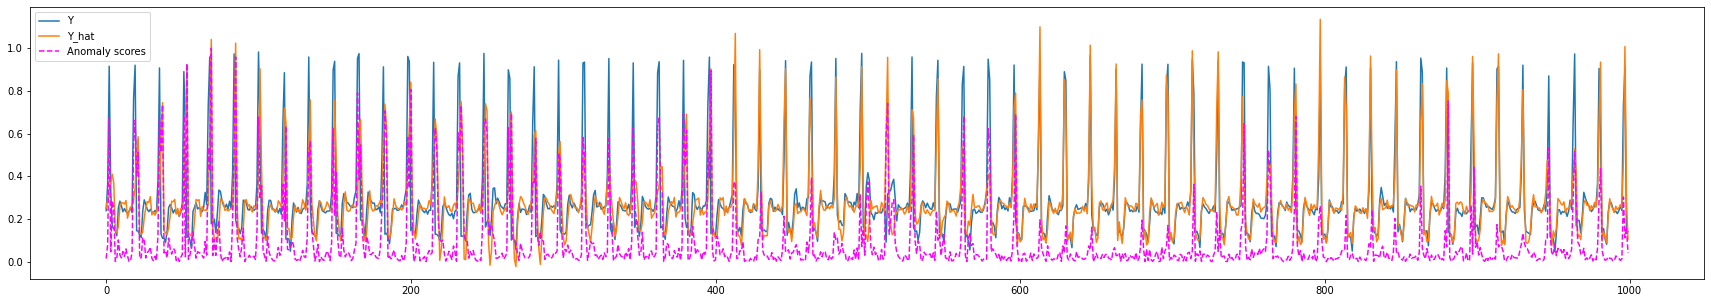

In [340]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(30, 5))

model_name = 'RNN_3'
start = np.argmax(rankingObj.predictions[model_name]['anomaly_labels'].flatten()) - 500
stop = np.argmax(rankingObj.predictions[model_name]['anomaly_labels'].flatten()) + 500

axes.plot(rankingObj.predictions[model_name]['Y'].flatten()[start:stop], label='Y')
axes.plot(rankingObj.predictions[model_name]['Y_hat'].flatten()[start:stop], label='Y_hat')

entity_scores = rankingObj.predictions[model_name]['entity_scores'].flatten()[start:stop]
entity_scores = (entity_scores - entity_scores.min())/(entity_scores.max() - entity_scores.min())
axes.plot(entity_scores, linestyle='--', c='magenta', label='Anomaly scores')
axes.legend()

In [337]:
rankingObj.models_performance_matrix.loc[:, 'Best F-1'].sort_values()

NN_3         0.033843
NN_2         0.057613
RM_1         0.058905
RM_2         0.061946
NN_1         0.121738
MD_1         0.130840
RM_3         0.138157
LSTMVAE_3    0.318179
RNN_2        0.335997
RNN_1        0.545450
RNN_3        0.575338
RNN_4        0.617643
LSTMVAE_2    0.646149
LSTMVAE_4    0.699995
DGHL_4       0.777773
DGHL_2       0.823524
DGHL_1       0.839995
DGHL_3       0.954540
LSTMVAE_1    0.999995
Name: Best F-1, dtype: float64

In [342]:
rankingObj.models_performance_matrix.loc[:, 'LIKELIHOOD'].sort_values()

LSTMVAE_2    0.262410
LSTMVAE_3    0.300855
LSTMVAE_4    0.303258
RM_1         0.310318
LSTMVAE_1    0.311437
NN_2         0.321635
DGHL_1       0.321731
DGHL_2       0.322317
NN_3         0.324020
DGHL_3       0.325102
DGHL_4       0.325305
RM_2         0.330283
RM_3         0.331505
MD_1         0.333642
RNN_4        0.338237
RNN_1        0.339469
RNN_2        0.341169
RNN_3        0.345557
NN_1         0.346032
Name: LIKELIHOOD, dtype: float64

In [347]:
anomaly_type = 'flip_rep_1_2'
rankingObj.models_performance_matrix.loc[:, f"SYNTHETIC_F1_{anomaly_type.split('_')[0]}_type_{anomaly_type}"].sort_values()

DGHL_3       0.204378
DGHL_1       0.209474
DGHL_2       0.272725
DGHL_4       0.302156
NN_2         0.323074
NN_3         0.323074
RM_3         0.334659
MD_1         0.341461
RM_2         0.366809
NN_1         0.428568
RNN_2        0.785042
RNN_4        0.865974
RNN_3        0.874995
RNN_1        0.884205
RM_1         0.976739
LSTMVAE_2    0.999995
LSTMVAE_1    0.999995
LSTMVAE_3    0.999995
LSTMVAE_4    0.999995
Name: SYNTHETIC_F1_flip_type_flip_rep_1_2, dtype: float64

In [350]:
anomaly_type = 'flip'
set([ '_'.join(i.split('_')[2:]) for i in rankingObj.synthetic_predictions['RNN_4'].keys() if anomaly_type in i])

['flip_rep_0_2',
 'flip_rep_0_2',
 'flip_rep_0_2',
 'flip_rep_0_2',
 'flip_rep_1_2',
 'flip_rep_1_2',
 'flip_rep_1_2',
 'flip_rep_1_2']

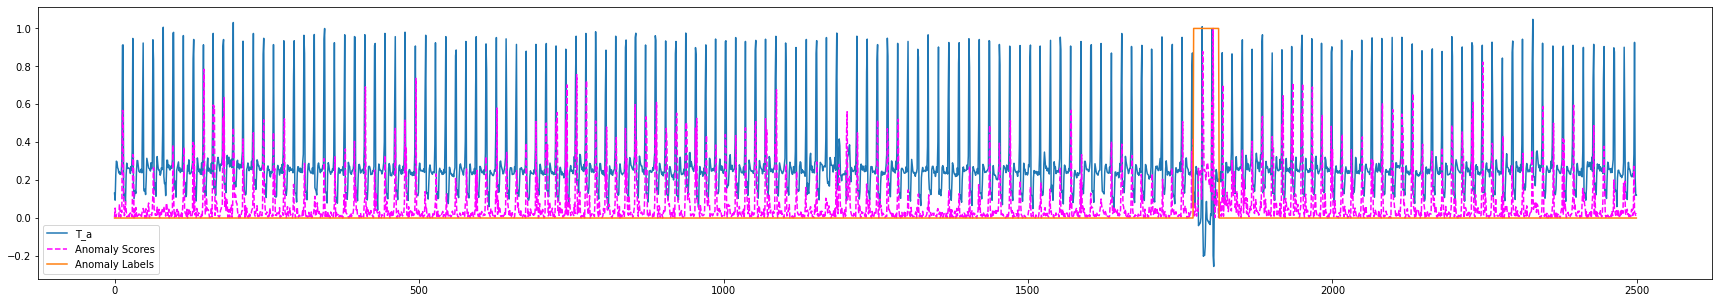

In [346]:
fig, axes = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(30, 5))

axes.plot(rankingObj.synthetic_predictions[model_name][f'Ta_type_{anomaly_type}'].flatten(), label='T_a')
entity_scores = rankingObj.synthetic_predictions[model_name][f'entityscores_type_{anomaly_type}'].flatten()
entity_scores = (entity_scores - entity_scores.min())/(entity_scores.max() - entity_scores.min())
axes.plot(entity_scores, label='Anomaly Scores', linestyle='--', c='magenta')
axes.plot(rankingObj.synthetic_predictions[model_name][f'anomalylabels_type_{anomaly_type}'].flatten(), label='Anomaly Labels')
axes.legend()

In [317]:
rankingObj.synthetic_predictions['RNN_4'].keys()

dict_keys(['anomalysizes_type_spikes_rep_0_0', 'anomalylabels_type_spikes_rep_0_0', 'entityscores_type_spikes_rep_0_0', 'Ta_type_spikes_rep_0_0', 'anomalysizes_type_contextual_rep_0_1', 'anomalylabels_type_contextual_rep_0_1', 'entityscores_type_contextual_rep_0_1', 'Ta_type_contextual_rep_0_1', 'anomalysizes_type_flip_rep_0_2', 'anomalylabels_type_flip_rep_0_2', 'entityscores_type_flip_rep_0_2', 'Ta_type_flip_rep_0_2', 'anomalysizes_type_speedup_rep_0_3', 'anomalylabels_type_speedup_rep_0_3', 'entityscores_type_speedup_rep_0_3', 'Ta_type_speedup_rep_0_3', 'anomalysizes_type_speedup_rep_0_4', 'anomalylabels_type_speedup_rep_0_4', 'entityscores_type_speedup_rep_0_4', 'Ta_type_speedup_rep_0_4', 'anomalysizes_type_speedup_rep_0_5', 'anomalylabels_type_speedup_rep_0_5', 'entityscores_type_speedup_rep_0_5', 'Ta_type_speedup_rep_0_5', 'anomalysizes_type_speedup_rep_0_6', 'anomalylabels_type_speedup_rep_0_6', 'entityscores_type_speedup_rep_0_6', 'Ta_type_speedup_rep_0_6', 'anomalysizes_type_n

In [343]:
ranks = trimmed_kemeny(rankingObj.ranks[:5, :], verbose=False, metric='influence', aggregation_type='kemeny')[1]
# ranks = trimmed_borda(rankingObj.ranks[:5, :], metric='influence', aggregation_type='borda')[1]
ranks = ranks.astype(int)
ranks

array([15, 12,  6,  3, 10, 17, 13,  4,  0,  9,  1, 16, 14,  8,  5, 11, 18,
        2,  7])

In [344]:
rankingObj.models_performance_matrix.iloc[:, 1].to_numpy()[ranks]

array([0.95454003, 0.83999479, 0.82352424, 0.77777274, 0.69999522,
       0.64614927, 0.61764261, 0.57533821, 0.54545044, 0.33599715,
       0.31817909, 0.1381566 , 0.13083989, 0.12173798, 0.0619463 ,
       0.05890546, 0.05761261, 0.03384334, 0.99999452])

In [94]:
anomaly_type = 'wander'
rankingObj.models_performance_matrix.loc[:, [i for i in rankingObj.models_performance_matrix.columns if ((anomaly_type in i) and ('F1' in i))]].sort_values(by='SYNTHETIC_F1_wander_type_wander_rep_1_14')

SYNTHETIC_F1_wander_type_wander_rep_1_16  \
NN_1                                       0.316015   
NN_3                                       0.437122   
NN_2                                       0.316015   
RNN_4                                      0.959995   
RM_3                                       0.883431   
RNN_1                                      0.929027   
DGHL_3                                     0.578309   
RNN_2                                      0.959995   
DGHL_1                                     0.575996   
DGHL_2                                     0.727268   
DGHL_4                                     0.628817   
RM_2                                       0.947363   
LSTMVAE_1                                  0.666662   
RNN_3                                      0.959995   
RM_1                                       0.959995   
MD_1                                       0.847054   

           SYNTHETIC_F1_wander_type_wander_rep_1_14  \
NN_1                                       0.223600   
NN_3                                       0.282396   
NN_2                                       0.282396   
RNN_4                                      0.519852   
RM_3                                       0.645735   
RNN_1                                      0.679241   
DGHL_3                                     0.685710   
RNN_2                                      0.688991   
DGHL_1                                     0.695648   
DGHL_2                                     0.699024   
DGHL_4                                     0.778374   
RM_2                                       0.799995   
LSTMVAE_1                                  0.832365   
RNN_3                                      0.935060   
RM_1                                       0.935060   
MD_1                                       0.979587   

           SYNTHETIC_F1_wander_type_wander_rep_0_15  \
NN_1                                       0.951802   
NN_3                                       0.810252   
NN_2                                       0.810252   
RNN_4                                      0.872923   
RM_3                                       0.987495   
RNN_1                                      0.844915   
DGHL_3                                     0.877773   
RNN_2                                      0.877773   
DGHL_1                                     0.844915   
DGHL_2                                     0.946103   
DGHL_4                                     0.868127   
RM_2                                       0.993706   
LSTMVAE_1                                  0.969320   
RNN_3                                      0.882677   
RM_1                                       0.902852   
MD_1                                       0.987495   

           SYNTHETIC_F1_wander_type_wander_rep_1_15  \
NN_1                                       0.366831   
NN_3                                       0.437122   
NN_2                                       0.366831   
RNN_4                                      0.923072   
RM_3                                       0.716413   
RNN_1                                      0.947363   
DGHL_3                                     0.642853   
RNN_2                                      0.947363   
DGHL_1                                     0.587751   
DGHL_2                                     0.705878   
DGHL_4                                     0.607591   
RM_2                                       0.905655   
LSTMVAE_1                                  0.818177   
RNN_3                                      0.947363   
RM_1                                       0.953637   
MD_1                                       0.993098   

           SYNTHETIC_F1_wander_type_wander_rep_1_17  \
NN_1                                       0.248274   
NN_3                                       0.279067   
NN_2                                       0.251289   
RNN_4                                      0.79

In [107]:
ranks_by_metrics, rank_prauc, rank_f1 = rankingObj.rank_models()
# Ranking data based on metrics
n_metrics, n_models = ranks_by_metrics.shape
print(f'Number of metrics: {n_metrics} | Number of models: {n_models}')

Number of metrics: 88 | Number of models: 16


In [42]:
from sklearn.cluster import AgglomerativeClustering
from model_selection.rank_aggregation import borda, influence, proximity, pagerank, kemeny, trimmed_borda, trimmed_kemeny
from sklearn.metrics import ndcg_score

influence_of_ranks = influence(ranks_by_metrics, aggregation_type='kemeny')
clustering = AgglomerativeClustering(n_clusters=2, linkage='single').fit_predict(influence_of_ranks.reshape((-1, 1)))

cluster_ids, counts = np.unique(clustering, return_counts=True)
max_cluster = cluster_ids[np.argmax(counts)]

_, trimmed_kemeny_rank = kemeny(ranks_by_metrics[np.where(clustering == max_cluster)[0], :], verbose=False)
trimmed_kemeny_rank = trimmed_kemeny_rank.astype(int)

praucs = rankingObj.models_performance_matrix.iloc[:, 0].to_numpy().squeeze()
f1s = rankingObj.models_performance_matrix.iloc[:, 1].to_numpy().squeeze()
model_names = list(rankingObj.models_performance_matrix.index)

print('==== Statistics ====')
print(f'Rank by PR-AUC: {rank_prauc}')
print(f'Rank by F1: {rank_f1}')
print(f'Predicted rank: {trimmed_kemeny_rank}')
print(f'Max PR-AUC: {np.max(praucs)} is achieved by {model_names[np.argmax(praucs)]}')
print(f'Max F-1: {np.max(f1s)} is achieved by {model_names[np.argmax(f1s)]}')
print(f'Our chosen model is {model_names[trimmed_kemeny_rank[0]]} which has PR-AUC={praucs[trimmed_kemeny_rank[0]]} and best F-1={f1s[trimmed_kemeny_rank[0]]}')
print(f'NDCG of predicted ranks with PR-AUC={ndcg_score(praucs.reshape((1, -1)), trimmed_kemeny_rank.reshape((1, -1)))} and best F-1={ndcg_score(f1s.reshape((1, -1)), trimmed_kemeny_rank.reshape((1, -1)))}')

==== Statistics ====
Rank by PR-AUC: [11.  9. 10. 12.  0.  2.  8.  1. 15. 16. 18. 17. 14.  7.  6.  5.  3. 13.
  4.]
Rank by F1: [ 0.  2.  1.  4.  3. 13. 16. 15. 18. 17. 14.  5.  7.  6. 12.  8.  9. 10.
 11.]
Predicted rank: [ 0 11 10  1  9 15 17 16 18 14 13 12  5  2  4  3  6  7  8]
Max PR-AUC: 0.5009251926112943 is achieved by NN_3
Max F-1: 0.9999946154097633 is achieved by DGHL_1
Our chosen model is DGHL_1 which has PR-AUC=0.06123632140465723 and best F-1=0.9999946154097633
NDCG of predicted ranks with PR-AUC=0.6259430272411995 and best F-1=0.6962679079247844
